In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#data
df = pd.read_csv('sales_data_2.csv')

In [23]:
df

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1
...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4


In [26]:
# 1. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv?
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values(by='Date')
df['Gross Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['3-Day Avg Gross Profit'] = df['Gross Profit'].rolling(window=3).mean()

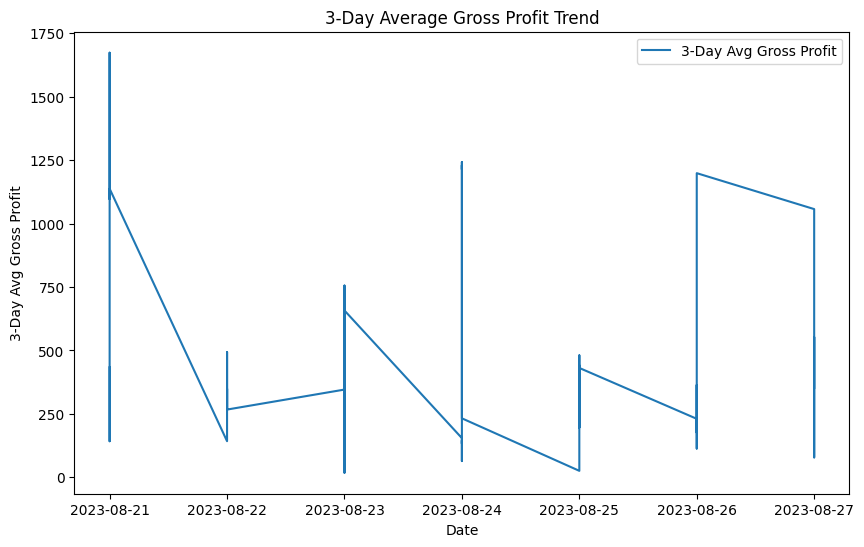

In [27]:
# 2. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.legend()
plt.show()


3 Can you optimize the sales process to ensure gross margin is maximized?

Optimizing the sales process involves analyzing vendor and customer performance to maximize gross margin.

3.1 Would you fire any vendor?

You can analyze the total gross profit by vendor and decide if any vendor should be fired. You may consider firing vendors with consistently low profitability.

In [33]:
vendor_profit = df.groupby('Firm bought from')['Gross Profit'].sum()
sorted_vendors = vendor_profit.sort_values(ascending=False)
top_n_vendors = sorted_vendors.head(5)
bottom_n_vendors = sorted_vendors.tail(5)
average_profit = vendor_profit.mean()

print("Top 5 profitable vendors:")
print(top_n_vendors)
print("\nBottom 5 profitable vendors:")
print(bottom_n_vendors)
print(f"\nAverage vendor profitability: {average_profit}")

Top 5 profitable vendors:
Firm bought from
Vendor4     6903.31
Vendor3     6370.67
Vendor7     4961.05
Vendor9     4266.70
Vendor10    3040.62
Name: Gross Profit, dtype: float64

Bottom 5 profitable vendors:
Firm bought from
Vendor5    1616.14
Vendor1    1555.59
Vendor2    1296.98
Vendor6    1217.95
Vendor8     253.74
Name: Gross Profit, dtype: float64

Average vendor profitability: 3148.275


3.2 Would you let go of any customer?

Similar to vendors, you can analyze the total gross profit by customer and decide if any customer should be let go.

In [34]:
customer_profit = df.groupby('Customer')['Gross Profit'].sum()

sorted_customers = customer_profit.sort_values(ascending=False)

top_n_customers = sorted_customers.head(5)
bottom_n_customers = sorted_customers.tail(5)

average_profit = customer_profit.mean()

print("Top 5 profitable customers:")
print(top_n_customers)
print("\nBottom 5 profitable customers:")
print(bottom_n_customers)
print(f"\nAverage customer profitability: {average_profit}")


Top 5 profitable customers:
Customer
Customer8     6498.91
Customer1     5310.57
Customer2     4215.67
Customer10    3692.44
Customer4     3337.37
Name: Gross Profit, dtype: float64

Bottom 5 profitable customers:
Customer
Customer7    2197.62
Customer6    1930.76
Customer9    1929.08
Customer5    1315.28
Customer3    1055.05
Name: Gross Profit, dtype: float64

Average customer profitability: 3148.2749999999996


4. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

You can calculate the percentiles for buying and selling prices as follows:

In [36]:
buying_price_percentiles = np.percentile(df['Buying price'], [25, 50, 75])
selling_price_percentiles = np.percentile(df['Selling price'], [25, 50, 75])

print(buying_price_percentiles)
print(selling_price_percentiles)

[29.9  60.76 78.32]
[ 38.975   78.99   103.3975]


Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [37]:
sapota_data = df[df['Firm bought from'] == 'Vendor4']
below_25th = sapota_data[sapota_data['Buying price'] < buying_price_percentiles[0]]
above_75th = sapota_data[sapota_data['Selling price'] > selling_price_percentiles[2]]

print(below_25th)

         Date Firm bought from  Buying price  Quantity bought   Customer  \
49 2023-08-25          Vendor4         17.85               80  Customer5   
59 2023-08-26          Vendor4         28.90               88  Customer8   

    Selling price  Quantity sold  Gross Profit  3-Day Avg Gross Profit  
49          20.47             20         52.40               25.673333  
59          36.83             11         87.23              176.443333  


In [38]:
print(above_75th)

         Date Firm bought from  Buying price  Quantity bought   Customer  \
34 2023-08-24          Vendor4         99.23               95  Customer1   
54 2023-08-26          Vendor4         82.77               66  Customer8   

    Selling price  Quantity sold  Gross Profit  3-Day Avg Gross Profit  
34         131.98             92        3013.0             1229.933333  
54         124.13             65        2688.4             1198.830000  
